**Machine Learning practice problems from book Machine Learning with Python Cookbook by Kyle Gallatin and Chris Albon**

# Dimensionality Reduction using Feature Extraction

how to reduce the dimensionality of our feature matrix
by creating new features with (ideally) similar abilities to train quality models but
with significantly fewer dimensions. This is called feature extraction

## Reducing features using Princiapl Components

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
# Load the data
digits = datasets.load_digits()

# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data)
# n_components has two operations,depending on the argument provided.
#If the argument is greater than 1, pca will return that many features.
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 64
Reduced number of features: 54



**Simple Analogy**:

Imagine your data points, when plotted, form an ellipse.

**PCA (whiten=False)** rotates this ellipse so its main axes are aligned with your coordinate axes. The shape is still an ellipse, potentially elongated.

**PCA with whiten=True** does the rotation, AND then it stretches or compresses the ellipse along its new axes until it becomes a perfect circle (where variance is equal in all directions, i.e., variance is 1 along each component).

Another parameter and argument is svd_solver="randomized", which implements a stochastic
algorithm to find the first principal components in often significantly less time.


## Reducing Features when Data is Linearly Inseparable

In [2]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
# Create linearly inseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
# Apply kernel PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


## Reducing Features by Maximizing Class Separability

Linear Discriminant Analysis (LDA) is different. LDA is a supervised dimensionality reduction technique.

Here's why LinearDiscriminantAnalysis is fitted with the target variable:

LDA's Goal: LDA's primary goal is not just to find directions of maximum variance (like PCA). Instead, its goal is to find the linear combinations of features (the "linear discriminants") that best maximize the separation between the classes in the target variable, while minimizing the variance within each class.

Knowing the Classes is Essential: To find the directions that maximize class separation, LDA must know which data points belong to which class during the fitting process. It needs the target variable to calculate things like:

The mean of each feature for each class.
The variance and covariance of features within each class.
The overall means and variances.
Using Class Information to Find Directions: LDA then uses these class-specific statistics to calculate the linear discriminants. The first discriminant (and often the most important one) is the direction that provides the greatest separation between the means of the classes relative to the variance within the classes. Without the target labels, LDA wouldn't know how to define or separate the classes, and it would just calculate directions based on overall variance, similar to PCA.

In [3]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Load Iris flower dataset:
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create and run an LDA, then use it to transform the features
# n-component is number of features we want returned
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
# Print the number of features
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_lda.shape[1])

Original number of features: 4
Reduced number of features: 1


In [4]:
lda.explained_variance_ratio_

array([0.9912126])

In [5]:
"""
Specifically, we can run LinearDiscriminantAnalysis with n_components set to
None to return the ratio of variance explained by every component feature, then
calculate how many components are required to get above some threshold of variance
explained (often 0.95 or 0.99):
"""
# Create and run LDA
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
# Create function
def select_n_components(var_ratio, goal_var: float) -> int:
  # Set initial variance explained so far
  total_variance = 0.0
  # Set initial number of features
  n_components = 0
  # For the explained variance of each feature:
  for explained_variance in var_ratio:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    # If we reach our goal level of explained variance
    if total_variance >= goal_var:
        # End the loop
        break
        # Return the number of components
  return n_components
# Run function
select_n_components(lda_var_ratios, 0.95)

1

## Reducing Features Using Matrix Factorization

NMF is an unsupervised technique for linear dimensionality reduction that factorizes
(i.e., breaks up into multiple matrices whose product approximates the original
matrix) the feature matrix into matrices representing the latent relationship between
observations and their features. Intuitively, NMF can reduce dimensionality because
in matrix multiplication, the two factors (matrices being multiplied) can have significantly
fewer dimensions than the product matrix. Formally, given a desired number
of returned features, r, NMF factorizes our feature matrix such that:

V ≈ WH

where V is our n × d feature matrix
(i.e., d features, n observations),

 W is an n × r matrix, and

 H is an r × d matrix.

By adjusting the value of r we can set the amount of
dimensionality reduction desired.
One major requirement of NMF is that, as the name implies, the feature matrix
cannot contain negative values. Additionally, unlike PCA and other techniques we
have examined, NMF does not provide the explained variance of the outputted
features. Thus, the best way for us to find the optimum value of n_components is by
trying a range of values to find the one that produces the best result

In [6]:
from sklearn.decomposition import NMF
from sklearn import datasets
# Load the data
digits = datasets.load_digits()
# Load feature matrix
features = digits.data
# Create, fit, and apply NMF
nmf = NMF(n_components=10, random_state=4)
features_nmf = nmf.fit_transform(features)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_nmf.shape[1])

Original number of features: 64
Reduced number of features: 10


## Reducing Features on Sparse Data

In [7]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np
# Load the data
digits = datasets.load_digits()
# Standardize feature matrix
features = StandardScaler().fit_transform(digits.data)
# Make sparse matrix
features_sparse = csr_matrix(features)
# Create a TSVD
tsvd = TruncatedSVD(n_components=10)
# Conduct TSVD on sparse matrix
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)
# Show results
print("Original number of features:", features_sparse.shape[1])
print("Reduced number of features:", features_sparse_tsvd.shape[1])

Original number of features: 64
Reduced number of features: 10


In [8]:
# Sum of first three components' explained variance ratios
tsvd.explained_variance_ratio_[0:3].sum()

np.float64(0.3003938539000117)

In [9]:
# Create and run a TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var):

  # Set initial variance explained so far
  total_variance = 0.0
  # Set initial number of features
  n_components = 0
  # For the explained variance of each feature:
  for explained_variance in var_ratio:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    # If we reach our goal level of explained variance
    if total_variance >= goal_var:
        # End the loop
        break
  # Return the number of components
  return n_components
# Run function
select_n_components(tsvd_var_ratios, 0.95)

40

## Dimensionality Reduction using Feature Selection

we will cover an alternative approach: selecting high-quality, informative features and
dropping less useful features. This is called feature selection

There are three types of feature selection methods: filter, wrapper, and embedded.

**Filter methods** select the best features by examining their statistical properties. Methods where we explicitly set a threshold for a statistic or manually select the number of features we want to keep

**Wrapper methods** are often the most effective, as they
find the best result through actual experimentation as opposed to naive assumptions.

Finally, **embedded methods** select the best feature subset as part of, as an extension of,
a learning algorithm’s training process.

### Thresholding Numerical Feature Variance

VT first calculates the variance of each feature:
where x is the feature vector, xi is an individual feature value, and μ is that feature’s
mean value. Next, it drops all features whose variance does not meet that threshold.

First, the variance is not centered;
that is, it is in the squared unit of the feature itself. Therefore, VT will not work when feature sets contain different units (e.g., one feature is in years while another is in dollars).

Second, the variance threshold is selected manually, so we have to use
our own judgment for a good value to select

In [10]:


from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
# Import some data to play with
iris = datasets.load_iris()
# Create features and target
features = iris.data
target = iris.target
# Create thresholder
thresholder = VarianceThreshold(threshold=.5)
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(features)
# View high variance feature matrix
features_high_variance[0:3]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

In [11]:
# View variances
thresholder.fit(features).variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [12]:
"""
Finally, if the features have been standardized (to mean zero and unit variance), then
for obvious reasons VT will not work correctly:
"""
# Load library
from sklearn.preprocessing import StandardScaler
# Standardize feature matrix
scaler = StandardScaler()
features_std = scaler.fit_transform(features)
# Caculate variance of each feature
selector = VarianceThreshold()
selector.fit(features_std).variances_



array([1., 1., 1., 1.])

### Thresholding Binary Feature Variance

As with numerical features, one strategy for selecting highly informative categorical
features and filtering out less informative ones is to examine their variances. In
binary features (i.e., Bernoulli random variables), variance is calculated as:
Var(x) = p(1-p)

where p is the proportion of observations of class 1. Therefore, by setting p, we can
remove features where the vast majority of observations are one class.

In [13]:
# Load library
from sklearn.feature_selection import VarianceThreshold
# Create feature matrix with:
# Feature 0: 80% class 0
# Feature 1: 80% class 1
# Feature 2: 60% class 0, 40% class 1
features = [[0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]
# Run threshold by variance
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

### Handling Highly Correlated Features

One problem we often run into in machine learning is highly correlated features. If
two features are highly correlated, then the information they contain is very similar,
and it is likely redundant to include both features. In the case of simple models like
linear regression, failing to remove such features violates the assumptions of linear
regression and can result in an artificially inflated R-squared value. The solution
to highly correlated features is simple: remove one of them from the feature set.
Removing highly correlated features by setting a correlation threshold is another
example of filtering.

In [14]:
# Load libraries
import pandas as pd
import numpy as np
# Create feature matrix with two highly correlated features
features = np.array([[1, 1, 1],
                      [2, 2, 0],
                      [3, 3, 1],
                      [4, 4, 0],
                      [5, 5, 1],
                      [6, 6, 0],
                      [7, 7, 1],
                      [8, 7, 0],
                      [9, 7, 1]])
# Convert feature matrix into DataFrame
dataframe = pd.DataFrame(features)
# Create correlation matrix
corr_matrix = dataframe.corr().abs()
# Select upper triangle of correlation matrix
# np.triu is a NumPy function that returns the upper triangle of an array.
#It creates a copy of the input array and sets all elements below the k-th diagonal to zero.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
dataframe.drop(dataframe.columns[to_drop], axis=1).head(3)

,0,2
0,1,1
1,2,0
2,3,1


In [15]:
# Correlation matrix
dataframe.corr()

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,-0.034503
2,0.000000,-0.034503,1.000000


In [16]:
"""
Second, we look at the upper triangle of the correlation matrix to identify pairs of
highly correlated features:
"""
# Upper triangle of correlation matrix
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


### Removing Irrelevant Features for Classification

Chi-square statistics examine the independence of two categorical vectors. That is,
the statistic is the difference between the observed number of observations in each
class of a categorical feature and what we would expect if that feature were independent
(i.e., no relationship) of the target vector.

A chi-squared statistic is a single number that tells you how much difference exists
between your observed counts and the counts you would expect if there were no
relationship at all in the population. By calculating the chi-squared statistic between a
feature and the target vector, we obtain a measurement of the independence between
the two. If the target is independent of the feature variable, then it is irrelevant for
our purposes because it contains no information we can use for classification. On the
other hand, if the two features are highly dependent, they likely are very informative
for training our model.



To use chi-squared in feature selection, we calculate the chi-squared statistic between
each feature and the target vector, then select the features with the best chi-square
statistics. In scikit-learn, we can use SelectKBest to select them. The parameter k determines the number of features we want to keep and filters out the least informative
features.
It is important to note that chi-square statistics can be calculated only between
two categorical vectors. For this reason, chi-squared for feature selection requires
that both the target vector and the features are categorical. However, if we have
a numerical feature we can use the chi-squared technique by first transforming
the quantitative feature into a categorical feature. Finally, to use our chi-squared
approach, all values need to be nonnegative.

Alternatively, if we have a numerical feature, we can use f_classif to calculate
the ANOVA F-value statistic with each feature and the target vector. F-value scores

In [17]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
# Load data
iris = load_iris()
features = iris.data
target = iris.target
# Convert to categorical data by converting data to integers
features = features.astype(int)
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [18]:
"""
If the features are quantitative, compute the ANOVA F-value between each feature
and the target vector:
"""
# Select two features with highest F-values
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


In [19]:
"""
Instead of selecting a specific number of features, we can use SelectPercentile to
select the top n percent of features:
"""
# Load library
from sklearn.feature_selection import SelectPercentile
# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 3


### Recursively Eliminating Features

Use scikit-learn’s RFECV to conduct recursive feature elimination (RFE) using crossvalidation
(CV). That is, use the wrapper feature selection method and repeatedly
train a model, each time removing a feature until model performance (e.g., accuracy)
becomes worse. The remaining features are the best:

In [20]:
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model
# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy",
message="^internal gelsd")
# Generate features matrix, target vector, and the true coefficients
features, target = make_regression(n_samples = 10000,
                                    n_features = 100,
                                    n_informative = 2,
                                    random_state = 1)
# Create a linear regression
ols = linear_model.LinearRegression()
# Recursively eliminate features
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 ],
       [-1.07500204,  2.56148527],
       [ 1.37940721, -1.77039484],
       ...,
       [-0.80331656, -1.60648007],
       [ 0.39508844, -1.34564911],
       [-0.55383035,  0.82880112]])

In [21]:
#Once we have conducted RFE, we can see the number of features we should keep:
# Number of best features
rfecv.n_features_

np.int64(2)

In [22]:
#We can also see which of those features we should keep:
# Which categories are best
rfecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [23]:
#We can even view the rankings of the features:
# Rank features best (1) to worst
rfecv.ranking_

array([22, 16, 91, 12, 52,  1, 96, 85, 37, 56, 82, 25, 44, 86, 51, 80,  4,
       95, 63, 84, 60,  3, 26, 89, 70, 61, 77, 88, 98, 19, 50, 39, 55, 53,
       92, 47, 99, 45, 28,  1, 41, 81, 90, 78, 74, 73, 64, 57, 93, 15, 72,
       32, 97, 48, 49, 66, 33, 43, 34, 59, 31, 68, 42, 14, 13, 46, 10, 65,
       36,  6, 58, 79, 20, 87,  2,  7, 23, 35, 38, 76,  8, 75, 17, 62, 67,
       69, 27, 71, 54, 29, 40,  9, 24, 18, 30,  5, 83, 94, 11, 21])

# **Model Evaluation**

## Cross Validating Models

In [24]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [25]:
# Load digits dataset
digits = datasets.load_digits()
# Create features matrix
features = digits.data
# Create target vector
target = digits.target
# Create standardizer
standardizer = StandardScaler()
# Create logistic regression object
logit = LogisticRegression()
#Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                              features, # Feature matrix
                              target, # Target vector
                              cv=kf, # Performance metric
                              scoring="accuracy", # Loss function
                              n_jobs=-1) # Use all CPU cores
# Calculate mean
cv_results.mean()

np.float64(0.9677329000309502)

In **validation**, our observations (features and targets) are split into two
sets, traditionally called the training set and the test set. We take the test set and put it
off to the side, pretending that we have never seen it before. Next we train our model using our training set, using the features and target vector to teach the model how
to make the best prediction. Finally, we simulate having never-before-seen external data by evaluating how our model performs on our test set.

**Weakness**:
1. The performance of the model can be
highly dependent on which few observations were selected for the test set.

2. the model is not being trained using all the available data, and it’s not being evaluated
on all the available data.
A better strategy, which overcomes these weaknesses, is called **k-fold cross-validation**

we split the data into k parts called folds. The model is then
trained using k - 1 folds -- combined into one training set—and then the last fold isused as a validation set.

We repeat this k times, each time using a different fold as the test
set. The performance on the model for each of the k iterations is then averaged to
produce an overall measurement.

In [26]:
# View score for all 5 folds
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

In [27]:
"""
when we are using KFCV to evaluate a classifier, it is often beneficial to
have folds containing roughly the same percentage of observations from each of
the different target classes (called stratified k-fold). For example, if our target vector
contained gender and 80% of the observations were male, then each fold would
contain 80% male and 20% female observations. In scikit-learn, we can conduct
stratified k-fold cross-validation by replacing the KFold class with StratifiedKFold.

Finally, when we are using validation sets or cross-validation, it is important to
preprocess data based on the training set and then apply those transformations to
both the training and test set. For example, when we fit our standardization object,
standardizer, we calculate the mean and variance of only the training set. Then we
apply that transformation (using transform) to both the training and test sets:
"""
# Import library
from sklearn.model_selection import train_test_split
# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)
# Fit standardizer to training set
standardizer.fit(features_train)
# Apply to both training and test sets which can then be used to train models
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

"""
The reason for this is because we are pretending that the test set is unknown data.
If we fit both our preprocessors using observations from both training and test sets,
some of the information from the test set leaks into our training set. This rule applies
for any preprocessing step such as feature selection.
scikit-learn’s pipeline package makes this easy to do while using cross-validation
techniques. We first create a pipeline that preprocesses the data (e.g., standardizer)
and then trains a model (logistic regression, logit):
"""
# Create a pipeline
pipeline = make_pipeline(standardizer, logit)
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                              features, # Feature matrix
                              target, # Target vector
                              cv=kf, # Performance metric
                              scoring="accuracy", # Loss function
                              n_jobs=-1) # Use all CPU cores


## Creating a Baseline Regression Model

In [28]:
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
# Load data
wine = load_wine()
# Create features
features, target = wine.data, wine.target
# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)
# Create a dummy regressor
# DummyRegressor allows us to create a very simple model that we can use as a baseline
# DummyRegressor uses the strategy parameter to set the method of making predictions
# if we set strategy to constant and use the constant parameter, we can set the dummy
# regressor to predict some constant value for every observation:
dummy = DummyRegressor(strategy='mean')
# "Train" dummy regressor
dummy.fit(features_train, target_train)
# Get R-squared score
dummy.score(features_test, target_test) # Returns Rsquared
# By default, score returns the coefficient of determination (R-squared, R2) score

-0.0480213580840978

In [29]:
# Create dummy regressor that predicts 1s for everything
clf = DummyRegressor(strategy='constant', constant=1)
clf.fit(features_train, target_train)
# Evaluate score
clf.score(features_test, target_test) # Returns Rsquared
# The closer R2 is to 1, the more of the variance in the target vector that is explained by the features.

-0.06299212598425186

In [30]:
# To compare, we train our model and evaluate the performance score
# Load library
from sklearn.linear_model import LinearRegression
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)
# Get R-squared score
ols.score(features_test, target_test)
0.804353263176954

0.804353263176954

## Creating a Baseline Classification Model

In [31]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
# Load data
iris = load_iris()
# Create target vector and feature matrix
features, target = iris.data, iris.target
# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)
# Create dummy classifier
# Strategy = stratified (makes prediction proportional to the class 20% women will predict that class 20% of the time)
# Strategy = uniform (will predict uniformly at random between the diffrent classes 80%-20% will become- 50%-50%)
dummy = DummyClassifier(strategy='uniform', random_state=1)
# "Train" model
dummy.fit(features_train, target_train)
# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

In [32]:
# By comparing the baseline classifier to our trained classifier, we can see the improvement:
# Load library
from sklearn.ensemble import RandomForestClassifier
# Create classifier
classifier = RandomForestClassifier()
# Train model
classifier.fit(features_train, target_train)
# Get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

## Evaluating Binary Classifier Predictions

Given a trained classification model, you want to evaluate its quality.

Use scikit-learn's cross_val_score to conduct cross-validation while using the
scoring parameter to define one of a number of performance metrics, including
accuracy, precision, recall, and F1. Accuracy is a common performance metric

Accuracy = (TP+TN)/(TP+TN+FP+FN)

**TP**: **true positives**.These are observations that are part of the positive class (has the disease, purchased the product, etc.) and that we predicted correctly.

**TN**: The number of **true negatives**. These are observations that are part of the negative
class (does not have the disease, did not purchase the product, etc.) and that we predicted correctly.

**FP**: The number of **false positives**, also called a **Type I error**. These are observations
that are predicted to be part of the positive class but are actually part of the negative class.

**FN**: The number of **false negatives**, also called a** Type II error**. These are observations
that are predicted to be part of the negative class but are actually part of the positive class.

In [33]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                            n_features = 3,
                            n_informative = 3,
                            n_redundant = 0,
                            n_classes = 2,
                            random_state = 1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

The appeal of accuracy is that it has an intuitive and plain English explanation:

the proportion of observations predicted correctly. However, in the real world, often our data has imbalanced classes (e.g., the 99.9% of observations are of class 1 and only 0.1% are class 2). When in the presence of imbalanced classes, accuracy suffers from a paradox where a model is highly accurate but lacks predictive power. For this reason, we are often motivated to use other metrics such as precision, recall, and the F1 score.

**Precision** is the proportion of every **observation predicted to be positive that is actually positive**. Models with high precision are pessimistic in that they predict an observation is of the
positive class only when they are very certain about it.

Precision = TP/(TP+FP)



In [34]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

**Recall** is the proportion of every **positive observation that is truly positive**. Recall measures the model's ability to identify an observation of the positive class.
Models with high recall are optimistic in that they have a low bar for predicting that an observation is in the positive class:

Recall = TP/(TP+FN)

In [35]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

The **F1 score** is the harmonic mean (a kind of average used for ratios):

F1 = 2 * ((Precision*Recall)/(Precision+Recall))

**This score is a measure of correctness achieved in positive prediction—that is, of observations labeled as positive, how many are actually positive**

In [36]:
# Cross-validate model using F1
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [37]:
"""
As an alternative to using cross_val_score, if we already have the true y values and
the predicted y values, we can calculate the metrics accuracy and recall directly:
# Load libraries
"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.1,
random_state=1)
# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)
# Calculate accuracy
accuracy_score(y_test, y_hat)

0.947

## Evaluating Binary Classifier Thresholds

You want to evaluate a binary classifier and various probability thresholds.

Use the **receiver operating characteristic (ROC)** curve to evaluate the quality of the
binary classifier.

In scikit-learn, we can use roc_curve to calculate the true and false
positives at each threshold, and then plot them

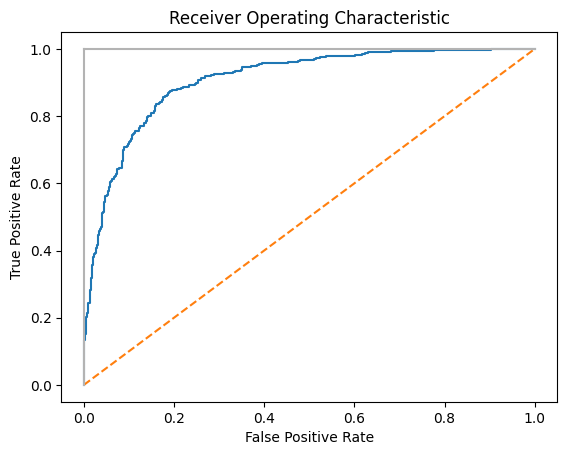

In [38]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                        n_features=10,
                                        n_classes=2,
                                        n_informative=3,
                                        random_state=3)
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

# Create classifier
logit = LogisticRegression()
# Train model
logit.fit(features_train, target_train)
"""
 --- Get predicted probabilities ---
 For ROC curves, you need the predicted *probability* that a data point
 belongs to the POSITIVE class, not just the predicted class label (0 or 1).
 logit.predict_proba(features_test):
   This method is available for many Scikit-learn classifiers. It returns
   the predicted probability for each class, for every sample in the input (features_test).
   For binary classification (2 classes), it returns a NumPy array of shape (n_samples_in_test, 2).
   - The first column (index 0) contains the probability of the sample belonging to class 0.
   - The second column (index 1) contains the probability of the sample belonging to class 1 (the positive class).
 [:,1]: This is NumPy slicing. It selects ALL rows (:) and ONLY the column at index 1.
        This extracts the array of predicted probabilities for the positive class (class 1).
target_probabilities = logit.predict_proba(features_test)[:,1]

'target_probabilities' is now a 1D NumPy array of shape (n_samples_in_test,)
# where each value is the model's predicted probability that the corresponding
# sample in features_test belongs to class 1.
"""

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(
                                                                target_test,
                                                                target_probabilities
                                                                )
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
#  [0, 1] is plotting the point where x=0, y=0 and the point where x=1, y=1.
plt.plot([0, 1], ls="--")
# [0, 0]: These are the x-coordinates (x=0 for both points).
# [1, 0]: These are the y-coordinates (y=1 for the first point, y=0 for the second).
# This draws a line connecting the point (0, 1) to the point (0, 0).
# This is the left edge of the ROC plot square
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [39]:
logit.predict_proba(features_test)

array([[0.8689235 , 0.1310765 ],
       [0.46319939, 0.53680061],
       [0.03395453, 0.96604547],
       ...,
       [0.46719807, 0.53280193],
       [0.67451725, 0.32548275],
       [0.16097517, 0.83902483]])

In [40]:
"""
Until now we have only examined models based on the values they predict. However,
in many learning algorithms, those predicted values are based on probability estimates.
That is, each observation is given an explicit probability of belonging in each
class. In our solution, we can use predict_proba to see the predicted probabilities for
the first observation:
"""
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

"""
In this example, the first observation has an ~87% chance of being in the negative
class (0) and a 13% chance of being in the positive class (1)
"""

'\nIn this example, the first observation has an ~87% chance of being in the negative\nclass (0) and a 13% chance of being in the positive class (1)\n'

In [41]:
#We can see the classes using classes_:
logit.classes_

array([0, 1])

The **TPR - True Positive Rate** is the number of observations correctly predicted true
divided by all true positive observations:

TPR = TP/(TP+FN)

The **FPR - False Positive Rate** is the number of incorrectly predicted positives divided by all true negative
observations:

FPR = FP/(FP+TN)

The ROC curve represents the respective TPR and FPR for every probability threshold.
For example, in our solution a threshold of roughly 0.50 has a TPR of ~0.83 and an FPR of ~0.16

In [42]:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.4981509475208573
True Positive Rate: 0.8367346938775511
False Positive Rate: 0.1627450980392157


In [43]:
"""
However, if we increase the threshold to ~80% (i.e., increase how certain the model
has to be before it predicts an observation as positive) the TPR drops significantly but
so does the FPR:
"""
print("Threshold:", threshold[49])
print("True Positive Rate:", true_positive_rate[49])
print("False Positive Rate:", false_positive_rate[49])

"""
This is because our higher requirement for being predicted to be in the positive class
has caused the model to not identify a number of positive observations (the lower
TPR) but has also reduced the noise from negative observations being predicted as
positive (the lower FPR).
"""

Threshold: 0.8058635463651345
True Positive Rate: 0.5653061224489796
False Positive Rate: 0.052941176470588235


'\nThis is because our higher requirement for being predicted to be in the positive class\nhas caused the model to not identify a number of positive observations (the lower\nTPR) but has also reduced the noise from negative observations being predicted as\npositive (the lower FPR).\n'

In [44]:
"""
In addition to being able to visualize the trade-off between TPR and FPR, the ROC
curve can also be used as a general metric for a model. The better a model is, the
higher the curve and thus the greater the area under the curve. For this reason, it
is common to calculate the area under the ROC curve (AUC ROC) to judge the
overall quality of a model at all possible thresholds. The closer the AUC ROC is
to 1, the better the model. In scikit-learn we can calculate the AUC ROC using
roc_auc_score
"""
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

np.float64(0.9073429371748699)

## Evaluating Multiclass Classifier Predictions

In [45]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 3,
random_state = 1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')


array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [46]:
"""
Precision, recall, and F1 scores are useful metrics that we have already covered in
detail in previous recipes. While all of them were originally designed for binary
classifiers, we can apply them to multiclass settings by treating our data as a set of
binary classes. Doing so enables us to apply the metrics to each class as if it were the
only class in the data, and then aggregate the evaluation scores for all the classes by
averaging them:

In this code, macro refers to the method used to average the evaluation scores from
the classes. The options are macro, weighted, and micro:
macro : Calculate the mean of metric scores for each class, weighting each class equally.
weighted : Calculate the mean of metric scores for each class, weighting each class proportional
to its size in the data.
micro : Calculate the mean of metric scores for each observation-class combination.
"""
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

## Visualizing a Classifier’s Performance

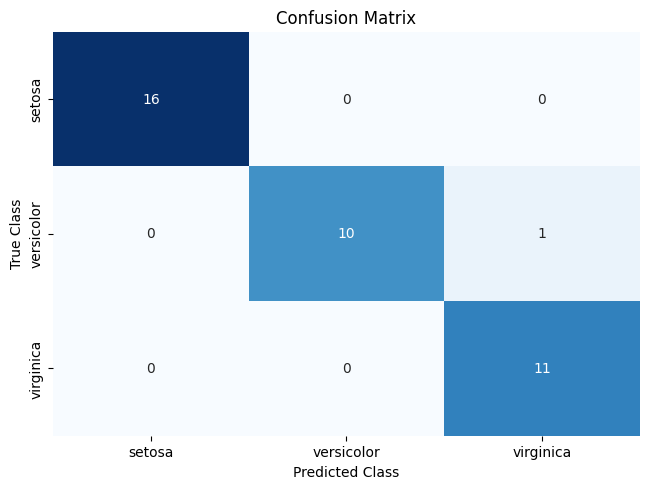

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
# Load data
iris = datasets.load_iris()
# Create features matrix
features = iris.data
# Create target vector
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=2)
# Create logistic regression
classifier = LogisticRegression()
# Train model and make predictions
target_predicted = classifier.fit(features_train,target_train).predict(features_test)
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Evaluating Regression Models

In [48]:
# Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
features, target = make_regression(n_samples = 100,
                                  n_features = 3,
                                  n_informative = 3,
                                  n_targets = 1,
                                  noise = 50,
                                  coef = False,
                                  random_state = 1)
# Create a linear regression object
ols = LinearRegression()
# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')
"""
The higher the value of MSE, the greater the total squared error and thus the
worse the model. One important note: by default, in scikit-learn, arguments of the scoring parameter
assume that higher values are better than lower values. However, this is not the case
for MSE, where higher values mean a worse model. For this reason, scikit-learn looks
at the negative MSE using the neg_mean_squared_error argument.
A common alternative regression evaluation metric is Rsquared(default)
"""

'\nThe higher the value of MSE, the greater the total squared error and thus the\nworse the model. One important note: by default, in scikit-learn, arguments of the scoring parameter\nassume that higher values are better than lower values. However, this is not the case\nfor MSE, where higher values mean a worse model. For this reason, scikit-learn looks\nat the negative MSE using the neg_mean_squared_error argument.\nA common alternative regression evaluation metric is Rsquared(default)\n'

## Evaluating Clustering Models

In [49]:
"""
You have used an unsupervised learning algorithm to cluster your data. Now you
want to know how well it did.
Use silhouette coefficients to measure the quality of the clusters (note that this does
not measure predictive performance):
"""
# Load libraries
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Generate features matrix
features, _ = make_blobs(n_samples = 1000,
                          n_features = 10,
                          centers = 2,
                          cluster_std = 0.5,
                          shuffle = True,
                          random_state = 1)
# Cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)
# Get predicted classes
target_predicted = model.labels_
# Evaluate model
silhouette_score(features, target_predicted)

np.float64(0.8916265564072141)

While we cannot evaluate predictions versus true values if we don’t have a target
vector, we can evaluate the nature of the clusters themselves. Intuitively, we can
imagine “good” clusters having very small distances between observations in the same
cluster (i.e., dense clusters) and large distances between the different clusters (i.e.,
well-separated clusters). Silhouette coefficients provide a single value measuring both
traits. Formally, the ith observation’s silhouette coefficient is:

S_i = (b_i - a_i)/ (max(a_i,b_i))

where s_i is the silhouette coefficient for observation i, a_i is the mean distance between
i and all observations of the same class, and b_i is the mean distance between i and
all observations from the closest cluster of a different class. The value returned by
silhouette_score is the mean silhouette coefficient for all observations. Silhouette
coefficients range between –1 and 1, with 1 indicating dense, well-separated clusters.

## Creating a Custom Evaluation Metric

In [50]:
"""
Create the metric as a function and convert it into a scorer function using scikitlearn’s
make_scorer:
"""
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
# Generate features matrix and target vector
features, target = make_regression(n_samples = 100,
                                  n_features = 3,
                                  random_state = 1)
# Create training set and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.10, random_state=1)

# Create custom metric
def custom_metric(target_test, target_predicted):
  # Calculate R-squared score
  r2 = r2_score(target_test, target_predicted)
  # Return R-squared score
  return r2
# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)
# Create ridge regression object
classifier = Ridge()
# Train ridge regression model
model = classifier.fit(features_train, target_train)
# Apply custom scorer
score(model, features_test, target_test)

0.9997906102882058

While scikit-learn has a number of built-in metrics for evaluating model performance,
it is often useful to define our own metrics. scikit-learn makes this easy using
make_scorer. First, we define a function that takes in two arguments—the ground
truth target vector and our predicted values—and outputs some score. Second, we
use make_scorer to create a scorer object, making sure to specify whether higher or
lower scores are desirable (using the greater_is_better parameter).

The custom metric in the solution (custom_metric) is a toy example since it simply
wraps a built-in metric for calculating the R2 score. In a real-world situation, we
would replace the custom_metric function with whatever custom metric we wanted.
However, we can see that the custom metric that calculates R2 does work by comparing
the results to scikit-learn’s r2_score built-in method:

In [51]:
# Predict values
target_predicted = model.predict(features_test)
# Calculate R-squared score
r2_score(target_test, target_predicted)

0.9997906102882058

## Visualizing the Effect of Training Set Size

Learning curves visualize the performance (e.g., accuracy, recall) of a model on the
training set and during cross-validation as the number of observations in the training
set increases. They are commonly used to determine if our learning algorithms would
benefit from gathering additional training data.
In our solution, we plot the accuracy of a random forest classifier at 50 different
training set sizes, ranging from 1% of observations to 100%. The increasing accuracy
score of the cross-validated models tell us that we would likely benefit from additional
observations (although in practice this might not be feasible).

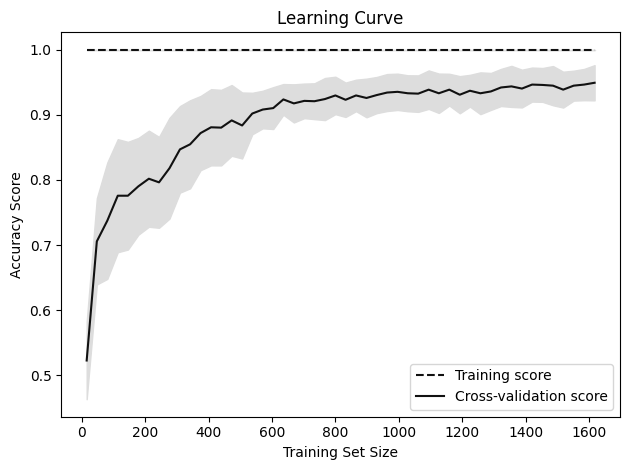

In [52]:
"""
You want to evaluate the effect of the number of observations in your training set on
some metric (accuracy, F1, etc.).
"""
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(# Classifier
                                                        RandomForestClassifier(),
                                                        # Feature matrix
                                                        features,
                                                        # Target vector
                                                        target,
                                                        # Number of folds
                                                        cv=10,
                                                        # Performance metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # Sizes of 50
                                                        # Training set
                                                        train_sizes=np.linspace(
                                                        0.01,
                                                        1.0,
                                                        50))
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Creating a Text Report of Evaluation Metrics

In [53]:
# You want a quick description of a classifier’s performance
"""
classification_report provides a quick means for us to see some common evaluation
metrics, including precision, recall, and F1 score
"""
# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Load data
iris = datasets.load_iris()
# Create features matrix
features = iris.data
# Create target vector
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)
# Create logistic regression
classifier = LogisticRegression()
# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)
# Create a classification report
print(classification_report(target_test,
target_predicted,
target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Visualizing the Effect of Hyperparameter Values

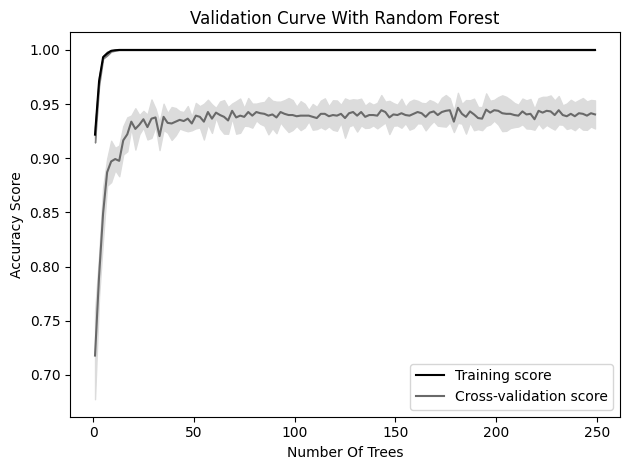

In [54]:
"""
You want to understand how the performance of a model changes as the value of
some hyperparameter changes
"""
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
# Create range of values for parameter
param_range = np.arange(1, 250, 2)
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
                                              # Classifier
                                              RandomForestClassifier(),
                                              # Feature matrix
                                              features,
                                              # Target vector
                                              target,
                                              # Hyperparameter to examine
                                              param_name="n_estimators",
                                              # Range of hyperparameter's values
                                              param_range=param_range,
                                              # Number of folds
                                              cv=3,
                                              # Performance metric
                                              scoring="accuracy",
                                              # Use all computer cores
                                              n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score",
color="dimgrey")
# Plot accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

it is occasionally useful to visualize how
model performance changes as the hyperparameter value changes. In our solution,
we plot the changes in accuracy for a random forest classifier for the training set
and during cross-validation as the number of trees increases. When we have a small
number of trees, both the training and cross-validation score are low, suggesting the
model is underfitted. As the number of trees increases to 250, the accuracy of both
levels off, suggesting there is probably not much value in the computational cost of
training a massive forest.

In scikit-learn, we can calculate the validation curve using validation_curve, which
contains three important parameters:

*param_name* : Name of the hyperparameter to vary

*param_range*: Value of the hyperparameter to use

*scoring* : Evaluation metric used to judge to model

# **Model Selection**

Many learning algorithms (e.g., support
vector classifier and random forests) have additional hyperparameters that are defined
by the user and affect how the model will learn its parameters. As we mentioned earlier
in the book, parameters (also sometimes called model weights) are what models
learn during the training process, whereas hyperparameters are provided manually by
us (the users).

For example, random forests are collections of decision trees (hence the word forest);
however, the number of decision trees in the forest is not learned by the algorithm
and must be set prior to fitting. This is often referred to as hyperparameter tuning,
hyperparameter optimization, or model selection.


## Selecting the Best Models Using Exhaustive Search

In [55]:
# You want to select the best model by searching over a range of hyperparameters

# Load libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=500, solver='liblinear')
# Create range of candidate penalty hyperparameter values
penalty = ['l1','l2']
# Create range of candidate regularization hyperparameter values
C = np.logspace(0, 4, 10)
# Create dictionary of hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = gridsearch.fit(features, target)
# Show the best model
print(best_model.best_estimator_)

LogisticRegression(C=np.float64(7.742636826811269), max_iter=500, penalty='l1',
                   solver='liblinear')


GridSearchCV is a brute-force approach to model selection using cross-validation.
Specifically, a user defines sets of possible values for one or multiple hyperparameters,
and then GridSearchCV trains a model using every value and/or combination of
values. The model with the best performance score is selected as the best model.

we define two possible values for the regularization penalty: ['l1', 'l2'].
For each combination of C and regularization penalty values, we train the model
and evaluate it using k-fold cross-validation. In our solution, we have 10 possible
values of C, 2 possible values of regularization penalty, and 5 folds. They create
10 × 2 × 5 = 100 candidate models, from which the best is selected.

In [56]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [57]:
"""
By default, after identifying the best hyperparameters, GridSearchCV will retrain a
model using the best hyperparameters on the entire dataset (rather than leaving a
fold out for cross-validation). We can use this model to predict values like any other
scikit-learn model:
verbose : 0 showing no output, and 1 to 3 outputting additional messages.
"""
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Selecting the Best Models Using Randomized Search

In [60]:
# You want a computationally cheaper method than exhaustive search to select the best model.
"""
search over a specific number
of random combinations of hyperparameter values from user-supplied distributions
(e.g., normal, uniform). scikit-learn implements this randomized search technique
with RandomizedSearchCV.
"""
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=500, solver='liblinear')
# Create range of candidate regularization penalty hyperparameter values
penalty = ['l1', 'l2']
# Create distribution of candidate regularization hyperparameter values
C = uniform(loc=0, scale=4)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create randomized search
randomizedsearch = RandomizedSearchCV(logistic,
                                      hyperparameters,
                                      random_state=1,
                                      n_iter=100,
                                      cv=5,
                                      verbose=0,
                                      n_jobs=-1)
# Fit randomized search
best_model = randomizedsearch.fit(features, target)
# Print best model
print(best_model.best_estimator_)

LogisticRegression(C=np.float64(1.668088018810296), max_iter=500, penalty='l1',
                   solver='liblinear')


In [61]:
# Define a uniform distribution between 0 and 4, sample 10 values
uniform(loc=0, scale=4).rvs(10)

array([1.00774572, 0.39084939, 0.0834088 , 2.08121142, 1.06309448,
       0.03434437, 1.06306806, 3.45531708, 0.736666  , 0.90033398])

In [62]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.668088018810296


In [63]:
"""
And just like with GridSearchCV, after the search is complete RandomizedSearchCV
fits a new model using the best hyperparameters on the entire dataset. We can use this
model like any other in scikit-learn; for example, to make predictions:

The number of sampled combinations of hyperparameters (i.e., the number of candidate
models trained) is specified with the n_iter (number of iterations) setting. It’s
worth noting that RandomizedSearchCV isn’t inherently faster than GridSearchCV, but
it often achieves comparable performance to GridSearchCV in less time just by testing
fewer combinations.
"""
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Selecting the Best Models from Multiple Learning Algorithms

In [64]:
"""
Create a dictionary of candidate learning algorithms and their hyperparameters to
use as the search space for GridSearchCV:
Why only one estimator initially in the Pipeline?

Because the search_space explicitly tells GridSearchCV which estimator(s) to
use for the "classifier" step within each grid. The initial
RandomForestClassifier() in the Pipeline definition is just the starting point
for that named step. GridSearchCV will swap it out as it explores the different
parameter grids defined in search_space.

This is a flexible way to compare different models and their respective
hyperparameters in one go, leveraging the Pipeline to represent the single
"modeling" step that can be filled by different algorithms.

In our solution we define a search space that includes
two learning algorithms: logistic regression and random forest classifier.
Each learning algorithm has its own hyperparameters, and we define their
candidate values using the format classifier__[hyperparameter name].

{'classifier': [LogisticRegression(max_iter=500, solver='liblinear')],
'classifier__penalty': ['l1', 'l2'],
'classifier__C': np.logspace(0, 4, 10)}
We can also create a similar dictionary for the random forest hyperparameters:
{'classifier': [RandomForestClassifier()],
'classifier__n_estimators': [10, 100, 1000],
'classifier__max_features': [1, 2, 3]}

"""
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Set random seed
np.random.seed(0)
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{"classifier": [LogisticRegression(max_iter=500,
                                solver='liblinear')],
                                "classifier__penalty": ['l1', 'l2'],
                                "classifier__C": np.logspace(0, 4, 10)},
                                {"classifier": [RandomForestClassifier()],
                                "classifier__n_estimators": [10, 100, 1000],
                                "classifier__max_features": [1, 2, 3]}]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)
# Fit grid search
best_model = gridsearch.fit(features, target)
# Print best model
print(best_model.best_estimator_)


Pipeline(steps=[('classifier',
                 LogisticRegression(C=np.float64(7.742636826811269),
                                    max_iter=500, penalty='l1',
                                    solver='liblinear'))])


In [65]:
"""
After the search is complete, we can use best_estimator_ to view the best model’s
learning algorithm and hyperparameters:
"""
# View best model
print(best_model.best_estimator_.get_params()["classifier"])

LogisticRegression(C=np.float64(7.742636826811269), max_iter=500, penalty='l1',
                   solver='liblinear')


In [66]:
"""
once we have fit the model selection search, we can
use this best model just like any other scikit-learn model:
"""
# Predict target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Selecting the Best Models When Preprocessing

Very often we will need to preprocess our data before using it to train a model.
We have to be careful to properly handle preprocessing when conducting model
selection. First, GridSearchCV uses cross-validation to determine which model has
the highest performance. However, in cross-validation, we are in effect pretending
that the fold held out as the test set is not seen, and thus not part of fitting any
preprocessing steps (e.g., scaling or standardization). For this reason, we cannot
preprocess the data and then run GridSearchCV. Rather, the preprocessing steps must
be a part of the set of actions taken by GridSearchCV.

FeatureUnion allows
us to combine multiple preprocessing actions properly. In our solution, we use
FeatureUnion to combine two preprocessing steps: standardize the feature values
(StandardScaler) and principal component analysis (PCA). This object is
called preprocess and contains both of our preprocessing steps. We then include
preprocess in a pipeline with our learning algorithm. The result is that this allows
us to outsource the proper (and confusing) handling of fitting, transforming, and
training the models with combinations of hyperparameters to scikit-learn.

When we include candidate component values
in the search space, they are treated like any other hyperparameter to be searched
over. In our solution, we defined features__pca__n_components': [1, 2, 3] in
the search space to indicate that we want to discover if one, two, or three principal
components produce the best model.

In [67]:
# Create a pipeline that includes the preprocessing step and any of its parameters
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Set random seed
np.random.seed(0)
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create a preprocessing object that includes StandardScaler features and PCA
preprocess = FeatureUnion([("std", StandardScaler()), ("pca", PCA())])
# Create a pipeline
pipe = Pipeline([("preprocess", preprocess),("classifier",
                                             LogisticRegression(max_iter=1000,
                                              solver='liblinear'))])

# Create space of candidate values
search_space = [{"preprocess__pca__n_components": [1, 2, 3],
                "classifier__penalty": ["l1", "l2"],
                "classifier__C": np.logspace(0, 4, 10)}]
# Create grid search
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1)
# Fit grid search
best_model = clf.fit(features, target)
# Print best model
print(best_model.best_estimator_)


Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('std', StandardScaler()),
                                                ('pca', PCA(n_components=1))])),
                ('classifier',
                 LogisticRegression(C=np.float64(7.742636826811269),
                                    max_iter=1000, penalty='l1',
                                    solver='liblinear'))])


In [68]:
"""
After model selection is complete, we can view the preprocessing values that produced
the best model. For example, we can see the best number of principal
components:
"""
# View best n_components
best_model.best_estimator_.get_params()['preprocess__pca__n_components']

1

## Speeding Up Model Selection with Parallelization

In [69]:
"""
Use all the cores in your machine by setting n_jobs=-1, which enables you to train
multiple models simultaneously

In our solution, we set n_jobs to -1, which tells scikit-learn to use all cores. However,
by default n_jobs is set to 1, meaning it uses only one core

"""
# Load libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=500, solver='liblinear')
# Create range of candidate regularization penalty hyperparameter values
penalty = ["l1", "l2"]
# Create range of candidate values for C
C = np.logspace(0, 4, 1000)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1, verbose=1)
# Fit grid search
best_model = gridsearch.fit(features, target)
# Print best model
print(best_model.best_estimator_)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
LogisticRegression(C=np.float64(5.926151812475554), max_iter=500, penalty='l1',
                   solver='liblinear')


## Speeding Up Model Selection Using Algorithm- Specific Methods

In [70]:
"""
If you are using a select number of learning algorithms, use scikit-learn’s modelspecific
cross-validation hyperparameter tuning, LogisticRegressionCV:

In scikit-learn, many learning algorithms (e.g., ridge, lasso, and elastic net
regression) have an algorithm-specific cross-validation method to take advantage of this.
For example, LogisticRegression is used to conduct a standard logistic regression
classifier, while LogisticRegressionCV implements an efficient cross-validated logistic
regression classifier that can identify the optimum value of the hyperparameter C
"""
from sklearn import linear_model, datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create cross-validated logistic regression
logit = linear_model.LogisticRegressionCV(Cs=100, max_iter=500,
solver='liblinear')
# Train model
logit.fit(features, target)
# Print model
print(logit)

LogisticRegressionCV(Cs=100, max_iter=500, solver='liblinear')


## Evaluating Performance After Model Selection

In [71]:
"""
Use nested cross-validation to avoid biased evaluation
Remember that in k-fold cross-validation, we train our model
on k–1 folds of the data, use this model to make predictions on the remaining fold,
and then evaluate our model on how well its predictions compare to the true values.
We then repeat this process k times.

In the model selection searches described in this chapter (i.e., GridSearchCV and
RandomizedSearchCV), we used cross-validation to evaluate which hyperparameter
values produced the best models. However, a nuanced and generally underappreciated
problem arises: since we used the data to select the best hyperparameter values,
we cannot use that same data to evaluate the model’s performance. The solution?
Wrap the cross-validation used for model search in another cross-validation!
In
nested cross-validation, the “inner” cross-validation selects the best model, while the
“outer” cross-validation provides an unbiased evaluation of the model’s performance.
In our solution, the inner cross-validation is our GridSearchCV object, which we then
wrap in an outer cross-validation using cross_val_score.
If you are confused, try a simple experiment. First, set verbose=1 so we can see what
is happening:

"""
# Load libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV, cross_val_score
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter=500, solver='liblinear')
# Create range of 20 candidate values for C
C = np.logspace(0, 4, 20)
# Create hyperparameter options
hyperparameters = dict(C=C)
# Create grid search
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1, verbose=0)
# Conduct nested cross-validation and output the average score
cross_val_score(gridsearch, features, target).mean()

np.float64(0.9733333333333334)

In [72]:
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=1)
best_model = gridsearch.fit(features, target)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [73]:
scores = cross_val_score(gridsearch, features, target)
"""
The output shows that the inner cross-validation trained 20 models five times to
find the best model, and this model was evaluated using an outer five-fold crossvalidation,
creating a total of 500 models trained.
"""

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


'\nThe output shows that the inner cross-validation trained 20 models five times to\nfind the best model, and this model was evaluated using an outer five-fold crossvalidation,\ncreating a total of 500 models trained.\n'

# **Linear Regression**

## Fitting a Line

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 2,
                                    n_targets = 1,
                                    noise = 0.2,
                                    coef = False,
                                    random_state = 1)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features, target)

In [75]:
# View the intercept
model.intercept_

np.float64(-0.009650118178816669)

In [76]:
# View the feature coefficients
model.coef_

array([1.95531234e-02, 4.42087450e+01, 5.81494563e+01])

In [77]:
# First value in the target vector - In our dataset, the target value is a
# randomly generated continuous variable
target[0]

np.float64(-20.870747595269407)

In [78]:
# Predict the target value of the first observation
# Using the predict method, we can predict the output based on the input features
model.predict(features)[0]

np.float64(-20.861927709296808)

In [79]:
# Print the score of the model on the training data
"""
The default score for linear regression in scikit learn is R2, which ranges from 0.0
(worst) to 1.0 (best).
"""
print(model.score(features, target))

0.9999901732607787


## Handling Interactive Effects

Sometimes a feature’s effect on our target variable is at least partially dependent on
another feature. For example, imagine a simple coffee-based example where we have
two binary features—the presence of sugar (sugar) and whether or not we have
stirred (stirred)—and we want to predict if the coffee tastes sweet. Just putting
sugar in the coffee (sugar=1, stirred=0) won’t make the coffee taste sweet (all the
sugar is at the bottom!) and just stirring the coffee without adding sugar (sugar=0,
stirred=1) won’t make it sweet either. Instead it is the interaction of putting sugar in
the coffee and stirring the coffee (sugar=1, stirred=1) that will make a coffee taste
sweet. The effects of sugar and stirred on sweetness are dependent on each other. In
this case we say there is an interaction effect between the features sugar and stirred.
We can account for interaction effects by including a new feature

y = β_0 + β_1 x1 + β_2 x2 + β_3 x1x2 + ϵ

In [80]:
"""
You have a feature whose effect on the target variable depends on another feature
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                    n_features = 2,
                                    n_informative = 2,
                                    n_targets = 1,
                                    noise = 0.2,
                                    coef = False,
                                    random_state = 1)
# Create interaction term
interaction = PolynomialFeatures(degree=3,
                                 include_bias=False,
                                 interaction_only=True)
features_interaction = interaction.fit_transform(features)

regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_interaction, target)

In [81]:
#observation’s values for each of those features:
# View the feature values for first observation
features[0]

array([0.0465673 , 0.80186103])

In [82]:
# To create an interaction term, we simply multiply those two values together
# for every observation:
# Import library
import numpy as np
# For each observation, multiply the values of the first and second feature
interaction_term = np.multiply(features[:, 0], features[:, 1])
# View interaction term for first observation
interaction_term[0]

"""
it can be
useful to use scikit-learn’s PolynomialFeatures to create interaction terms for all
combinations of features. We can then use model selection strategies to identify the
combination of features and interaction terms that produces the best model.
"""

'\nit can be\nuseful to use scikit-learn’s PolynomialFeatures to create interaction terms for all\ncombinations of features. We can then use model selection strategies to identify the\ncombination of features and interaction terms that produces the best model.\n'

In [83]:
"""
To create interaction terms using PolynomialFeatures, there are three important
parameters we must set. Most important, interaction_only=True tells
PolynomialFeatures to return only interaction terms (and not polynomial features

By default, PolynomialFeatures will add a
feature containing 1s called a bias. We can prevent that with include_bias=False.
Finally, the degree parameter determines the maximum number of features to create
interaction terms from (in case we wanted to create an interaction term that is the
combination of three features). We can see the output of PolynomialFeatures from
our solution by checking to see if the first observation’s feature values and interaction
term value match our manually calculated version
"""
# View the values of the first observation
features_interaction[0]

array([0.0465673 , 0.80186103, 0.0373405 ])

## Fitting a Nonlinear Relationship

So far we have discussed modeling only linear relationships. An example of a linear
relationship would be the number of stories a building has and the building's height.
In linear regression, we assume the effect of number of stories and building height is
approximately constant, meaning a 20-story building will be roughly twice as high as
a 10-story building, which will be roughly twice as high as a 5-story building. Many
relationships of interest, however, are not strictly linear.

Often we want to model a nonlinear relationship—for example, the relationship
between the number of hours a student studies and the score she gets on a test.
Intuitively, we can imagine there is a big difference in test scores between students
who study for one hour compared to students who did not study at all. However, there is a much smaller difference in test scores between a student who studied for 99
hours and a student who studied for 100 hours. The effect that one hour of studying
has on a student's test score decreases as the number of hours increases.

Polynomial regression is an extension of linear regression that allows us to model
nonlinear relationships.

y = β_0 + β_1 x1 + β_2 x1^2
 + . . . + β_d x1^d + ϵ

 where d is the degree of the polynomial. How are we able to use a linear regression
for a nonlinear function? The answer is that we do not change how the linear
regression fits the model but rather only add polynomial features. That is, the linear
regression does not “know” that the x^2 is a quadratic transformation of x. It just
considers it one more variable.

In [84]:
"""
PolynomialFeatures has two important parameters. First, degree determines the
maximum number of degrees for the polynomial features. For example, degree=3 will
generate x^2 and x^3. Second, by default PolynomialFeatures includes a feature containing
only 1s (called a bias). We can remove that by setting include_bias=False.
"""

# You want to model a nonlinear relationship.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 2,
                                    n_targets = 1,
                                    noise = 0.2,
                                    coef = False,
                                    random_state = 1)
# Create polynomial features x^2 and x^3
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)
# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(features_polynomial, target)

In [85]:
# View first observation
features[0]

array([ 0.58591043,  0.78477065, -0.95542526])

In [86]:
# View first observation raised to the second power, x^2
features[0]**2

array([0.34329103, 0.61586497, 0.91283743])

In [87]:
# View first observation raised to the third power, x^3
features[0]**3

array([ 0.2011378 ,  0.48331276, -0.87214794])

In [88]:
# View the first observation's values for x, x^2, and x^3
features_polynomial[0]

array([ 0.58591043,  0.78477065, -0.95542526,  0.34329103,  0.45980531,
       -0.55979363,  0.61586497, -0.74978971,  0.91283743,  0.2011378 ,
        0.26940473, -0.32798893,  0.36084171, -0.43930961,  0.53484097,
        0.48331276, -0.58841296,  0.71636803, -0.87214794])

## Reducing Variance with Regularization

Regularized regression learners are similar, except they attempt to minimize RSS and
some penalty for the total size of the coefficient values, called a shrinkage penalty
because it attempts to “shrink” the model. There are two common types of regularized
learners for linear regression: ridge regression and the lasso

In **ridge regression**, the shrinkage
penalty is a tuning hyperparameter multiplied by the squared sum of all coefficients

The **lasso** is similar, except the shrinkage penalty is a tuning hyperparameter
multiplied by the sum of the absolute value of all coefficients

As a very
general rule of thumb, ridge regression often produces slightly better predictions than
lasso, but lasso produces more interpretable
models.

If we want a balance between ridge and lasso's penalty functions we
can use **elastic net**, which is simply a regression model with both penalties included

In [89]:
"""
Use a learning algorithm that includes a shrinkage penalty (also called regularization)
like ridge regression and lasso regression
"""
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 2,
                                    n_targets = 1,
                                    noise = 0.2,
                                    coef = False,
                                    random_state = 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create ridge regression with an alpha value
regression = Ridge(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

## Reducing Features with Ridge Regression

In [90]:
"""
The hyperparameter, α, lets us control how much we penalize the coefficients, with
higher values of α creating simpler models. The ideal value of α should be tuned like
any other hyperparameter. In scikit-learn, α is set using the alpha parameter.
scikit-learn includes a RidgeCV method that allows us to select the ideal value for α

One final note: because in linear regression the value of the coefficients is partially
determined by the scale of the feature, and in regularized models all coefficients are
summed together, we must make sure to standardize the feature prior to training.

"""
from sklearn.linear_model import RidgeCV
# Create ridge regression with three alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
# Fit the linear regression
model_cv = regr_cv.fit(features_standardized, target)
# View coefficients
model_cv.coef_

array([1.29223201e-02, 4.40972291e+01, 5.38979372e+01])

In [91]:
# View alpha
model_cv.alpha_

np.float64(0.1)

## Reducing Features with Lasso Regression

In [92]:
"""
One interesting characteristic of lasso regression’s penalty is that it can shrink the
coefficients of a model to zero, effectively reducing the number of features in the
model. For example, in our solution we set alpha to 0.5, and we can see that many
of the coefficients are 0, meaning their corresponding features are not used in the
model
"""

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 2,
                                    n_targets = 1,
                                    noise = 0.2,
                                    coef = False,
                                    random_state = 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create lasso regression with alpha value
regression = Lasso(alpha=0.5)
# Fit the linear regression
model = regression.fit(features_standardized, target)

In [93]:
# View coefficients
model.coef_

array([-0.        , 43.58618393, 53.39523724])

In [94]:
"""
However, if we increase α to a much higher value, we see that literally none of the
features are being used:
"""
# Create lasso regression with a high alpha
regression_a10 = Lasso(alpha=10)
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_

array([-0.        , 32.92181899, 42.73086731])

# **Trees and Forests**

## Training a Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
model = decisiontree.fit(features, target)

In [96]:
"""
Decision tree learners attempt to find a decision rule that produces the greatest
decrease in impurity at a node. While there are a number of measurements of
impurity, by default DecisionTreeClassifier uses Gini impurity

This process of finding the decision rules that create splits to
decrease impurity is repeated recursively until all leaf nodes are pure (i.e., contain
only one class) or some arbitrary cutoff is reached.

In scikit-learn, DecisionTreeClassifier operates like other learning methods; after
the model is trained using fit, we can use the model to predict the class of an
observation
"""
# Make new observation
observation = [[ 5, 4, 3, 2]]
# Predict observation's class
model.predict(observation)

array([1])

In [97]:
#We can also see the predicted class probabilities of the observation:
# View predicted class probabilities for the three classes
model.predict_proba(observation)

array([[0., 1., 0.]])

In [98]:
#Finally, if we want to use a different impurity measurement
#we can use the criterion parameter:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
# Train model
model_entropy = decisiontree_entropy.fit(features, target)

## Training a Decision Tree Regressor

In [99]:
"""
Decision tree regression works similarly to decision tree classification; however,
instead of reducing Gini impurity or entropy, potential splits are by default measured
on how much they reduce mean squared error (MSE)
"""

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
# Load data with only two features
diabetes = datasets.load_diabetes()
features = diabetes.data
target = diabetes.target
# Create decision tree regressor object
decisiontree = DecisionTreeRegressor(random_state=0)
# Train model
model = decisiontree.fit(features, target)

In [100]:
# Make new observation
observation = [features[0]]
# Predict observation's value
model.predict(observation)

array([151.])

In [101]:
# Create decision tree classifier object using MAE
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error",
random_state=0)
# Train model
model_mae = decisiontree_mae.fit(features, target)

## Visualizing a Decision Tree Model

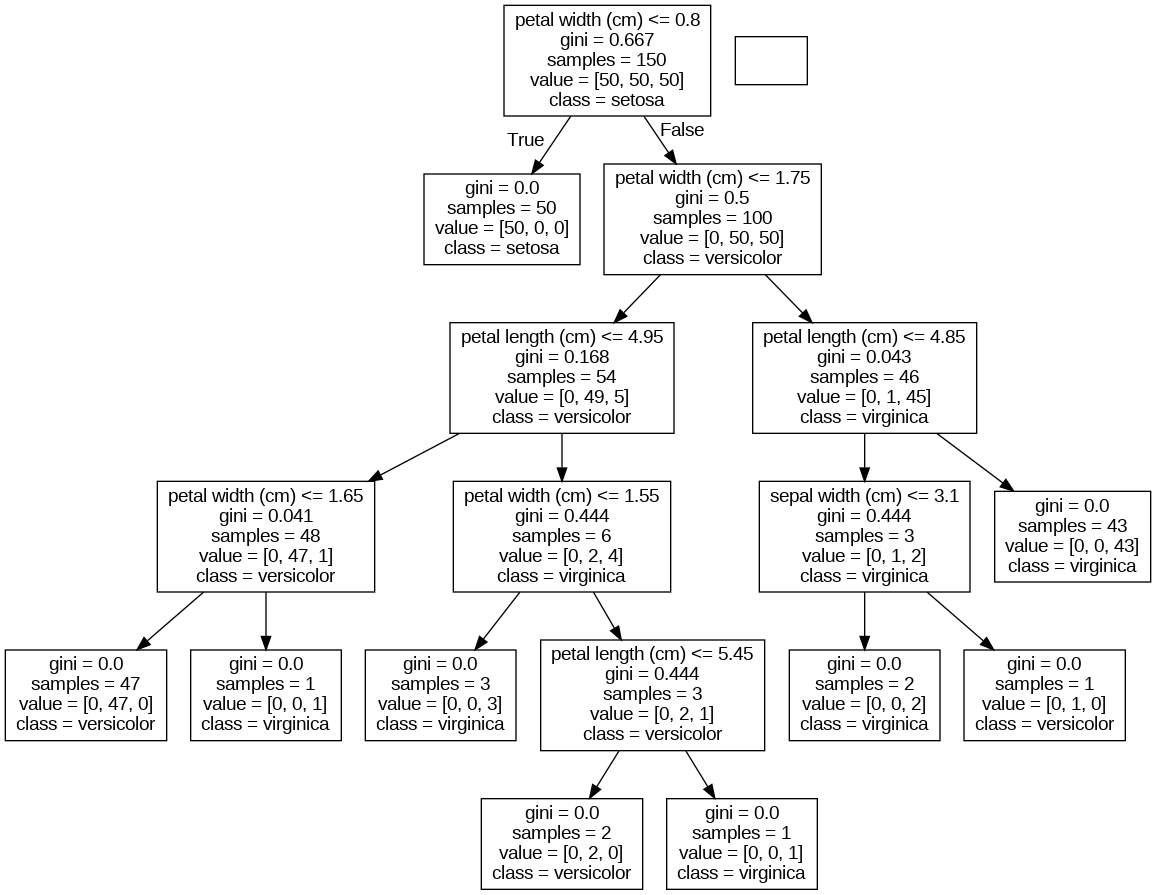

In [102]:
"""
One of the advantages of decision tree classifiers is that we can visualize the entire
trained model, making decision trees one of the most interpretable models in
machine learning. In our solution, we exported our trained model in DOT format (a
graph description language) and then used that to draw the graph
"""
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)
# Train model
model = decisiontree.fit(features, target)
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

If we want to use the decision tree in other applications or reports, we can easily
export the visualization into PDF or a PNG image:

Create PDF :
graph.write_pdf("iris.pdf")

Create PNG :
graph.write_png("iris.png")

## Training a Random Forest Classifier

In [103]:
"""
You want to train a classification model using a “forest” of
randomized decision trees. A common problem with decision trees is that they tend to fit the training data
too closely (i.e., overfitting). This has motivated the widespread use of an ensemble
learning method called random forest.

In a random forest, many decision trees are
trained, but each tree receives only a bootstrapped sample of observations (i.e., a
random sample of observations with replacement that matches the original number
of observations), and each node considers only a subset of features when determining
the best split. This forest of randomized decision trees (hence the name) votes to
determine the predicted class.

However, being a forest rather than an individual decision tree,
RandomForestClassifier has certain parameters that are either unique to random
forests or particularly important. First, the max_features parameter determines the
maximum number of features to be considered at each node and takes a number
of arguments including integers (number of features), floats (percentage of features),
and sqrt (square root of the number of features). By default, max_features is set to
auto, which acts the same as sqrt

Second, the bootstrap parameter allows us to set whether the subset of observations considered for a tree is created using sampling
with replacement (the default setting) or without replacement.

Third, n_estimators sets the number of decision trees to include in the forest.

"""
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

In [104]:
# Make new observation
observation = [[ 5, 4, 3, 2]]
# Predict observation's class
model.predict(observation)

array([1])

In [105]:
# Create random forest classifier object using entropy
randomforest_entropy = RandomForestClassifier(
criterion="entropy", random_state=0)
# Train model
model_entropy = randomforest_entropy.fit(features, target)

## Training a Random Forest Regressor

In [106]:
"""
Just as we can make a forest of decision tree classifiers, we can make a forest of
decision tree regressors, where each tree uses a bootstrapped subset of observations
and at each node the decision rule considers only a subset of features. As with
RandomForestClassifier we have certain important parameters

max_features
Sets the maximum number of features to consider at each node. Defaults to p
features, where p is the total number of features.

bootstrap
Sets whether or not to sample with replacement. Defaults to True.

n_estimators
Sets the number of decision trees to construct. Defaults to 10.
"""

from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
# Load data with only two features
diabetes = datasets.load_diabetes()
features = diabetes.data
target = diabetes.target
# Create random forest regressor object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)

## Evaluating Random Forests with Out-of-Bag Errors

In [107]:
"""
In random forests, each decision tree is trained using a bootstrapped subset of
observations. This means that for every tree there is a separate subset of observations
not being used to train that tree. These are called out-of-bag (OOB) observations

We can use OOB observations as a test set to evaluate the performance of our random
forest. For every observation, the learning algorithm compares the observation’s true value
with the prediction from a subset of trees not trained using that observation. The
overall score is calculated and provides a single measure of a random forest’s performance.
OOB score estimation is an alternative to cross-validation.

In scikit-learn, we can compute OOB scores of a random forest by setting
oob_score=True in the random forest object (i.e., RandomForestClassifier). The
score can be retrieved using oob_score_.

"""

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(
random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# View out-of-bag-error
randomforest.oob_score_

0.9533333333333334

## Identifying Important Features in Random Forests

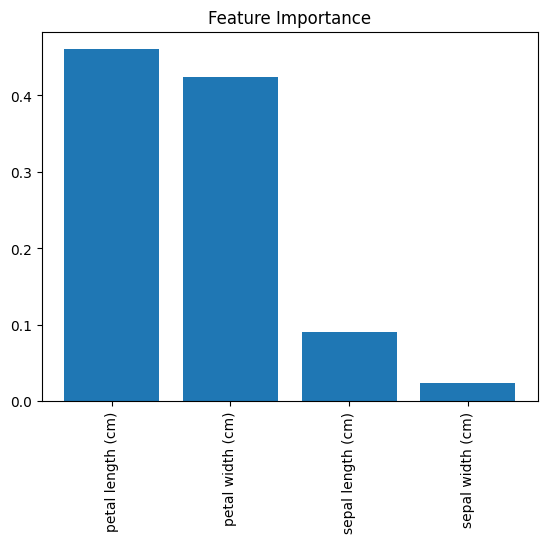

In [108]:
"""
Calculate and visualize the importance of each feature by inspecting the model’s
feature_importances_ attribute.

we visualized a decision tree classifier model and saw that decision
rules based only on petal width were able to classify many observations correctly.
Intuitively, we can say this means that petal width is an important feature in
our classifier. More formally, features with splits that have the greater mean decrease in
impurity (e.g., Gini impurity or entropy in classifiers and variance in regressors) are
considered more important.

However, there are two things to keep in mind regarding feature importance. First,
scikit-learn requires that we break up nominal categorical features into multiple
binary features. This has the effect of spreading the importance of that feature across
all of the binary features and can make each feature appear to be unimportant
even when the original nominal categorical feature is highly important.

Second, if two features are highly correlated, one feature will claim much of the importance,
making the other feature appear to be far less important, which has implications for
interpretation if not considered.

In scikit-learn, classification and regression decision trees and random forests can
report the relative importance of each feature using the feature_importances_
method:

"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [109]:
# View feature importances - The higher the number, the more important the feature
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

## Selecting Important Features in Random Forests

In [110]:
"""
Identify the importance features and retrain the model using only the most important
features.

In scikit-learn we can use a simple two-stage workflow to create a model with
reduced features.

First, we train a random forest model using all features. Then,
we use this model to identify the most important features. Next, we create a
new feature matrix that includes only these features. In our solution, we used the
SelectFromModel method to create a feature matrix containing only features with an
importance greater than or equal to some threshold value. Finally, we created a new
model using only those features.

We must note two caveats to this approach. First, nominal categorical features that
have been one-hot encoded will see the feature importance diluted across the binary
features. Second, the feature importance of highly correlated features will be effectively
assigned to one feature and not evenly distributed across both features.

"""
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)
# Create new feature matrix using selector
features_important = selector.fit_transform(features, target)
# Train random forest using most important features
model = randomforest.fit(features_important, target)

## Handling Imbalanced Classes

In [111]:
"""
Train a decision tree or random forest model with class_weight="balanced":

We can set
RandomForestClassifier to correct for imbalanced classes using the class_weight
parameter. If supplied with a dictionary in the form of class names and their
desired weights (e.g., {"male": 0.2, "female": 0.8})

However, often a more useful argument is bal
anced, wherein classes are automatically weighted inversely proportional to how
frequently they appear in the data

"""
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0,
                                      n_jobs=-1,
                                      class_weight="balanced")
# Train model
model = randomforest.fit(features, target)

## Controlling Tree Size

In [112]:
"""
Use the tree structure parameters in scikit-learn tree-based learning algorithms

max_depth
Maximum depth of the tree. If None, the tree is grown until all leaves are pure. If
an integer, the tree is effectively “pruned” to that depth

min_samples_split
Minimum number of observations at a node before that node is split. If an
integer is supplied as an argument, it determines the raw minimum, while if a
float is supplied, the minimum is the percent of total observations.

min_samples_leaf
Minimum number of observations required to be at a leaf. Uses the same arguments
as min_samples_split.

max_leaf_nodes
Maximum number of leaves.

min_impurity_split
Minimum impurity decrease required before a split is performed.

While it is useful to know these parameters exist, most likely we will only be
using max_depth and min_impurity_split because shallower trees (sometimes called
stumps) are simpler models and thus have lower variance

"""
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)
# Train model
model = decisiontree.fit(features, target)

## Improving Performance Through Boosting

In a random forest, an ensemble (group) of randomized decision trees predicts the
target vector. An alternative, and often more powerful, approach is called boosting.
In one form of boosting called AdaBoost, we iteratively train a series of weak models
(most often a shallow decision tree, sometimes called a stump), each iteration giving
higher priority to observations the previous model predicted incorrectly. More specifically,
in AdaBoost:

1. Assign every observation, x_i, an initial weight value, w_i = 1/n , where n is the total
number of observations in the data.

2. Train a “weak” model on the data.

3. For each observation:
 - If weak model predicts x_i correctly, w_i is decreased.
 - If weak model predicts x_i incorrectly, w_i is increased.

4. Train a new weak model where observations with greater wi are given greater
priority.

5. Repeat steps 4 and 5 until the data is perfectly predicted or a preset number of
weak models has been trained.

The result is an aggregated model where individual weak models focus on more difficult
(from a prediction perspective) observations. In scikit-learn, we can implement AdaBoost using AdaBoostClassifier or AdaBoostRegressor. The most important
parameters are base_estimator, n_estimators, learning_rate, and loss.

**base_estimator**
base_estimator is the learning algorithm to use to train the weak models. The
most common learner to use with AdaBoost is a decision tree, the parameter’s
default argument.

**n_estimators**
n_estimators is the number of models to iteratively train.

**learning_rate**
learning_rate is the contribution of each model to the weights, and it defaults
to 1. Reducing the learning rate will mean the weights will be increased or
decreased to a small degree, forcing the model to train slower (but sometimes
resulting in better performance scores).

**loss**
loss is exclusive to AdaBoostRegressor and sets the loss function to use when
updating weights. This defaults to a linear loss function but can be changed to
square or exponential


In [113]:
"""
Train a boosted model using AdaBoostClassifier or AdaBoostRegressor
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create adaboost tree classifier object
adaboost = AdaBoostClassifier(random_state=0)
# Train model
model = adaboost.fit(features, target)


## Training an XGBoost Model

XGBoost (which stands for Extreme Gradient Boosting) is a very popular gradient
boosting algorithm in the machine learning space. Though it is not always a treebased
model, it is frequently applied to ensembles of decision trees


In [114]:
# Load libraries
import xgboost as xgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create dataset
xgb_train = xgb.DMatrix(features, label=target)
# Define parameters
param = {
'objective': 'multi:softprob',
'num_class': 3
}
# Train model
gbm = xgb.train(param, xgb_train)
# Get predictions
predictions = argmax(gbm.predict(xgb_train), axis=1)
# Get a classification report
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



## Improving Real-Time Performance with LightGBM

In [115]:
"""
You need to train a gradient boosted tree-based model that is computationally
optimized

The lightgbm library is used for gradient boosted machines and is highly optimized
for training time, inference, and GPU support. As a result of its computational efficiency,
it’s often used in production and in large scale settings. Although scikit-learn
models are typically easier to use, some libraries, such as lightgbm, can be handy
when you’re limited by large data or strict model training/serving times.

"""
import lightgbm as lgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create dataset
lgb_train = lgb.Dataset(features, target)
# Define parameters
params = {
'objective': 'multiclass',
'num_class': 3,
'verbose': -1,
}
# Train model
gbm = lgb.train(params, lgb_train)
# Get predictions
predictions = argmax(gbm.predict(features), axis=1)
# Get a classification report
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



# **K-Nearest Neighbors**

KNN is often considered a lazy
learner; it doesn’t technically train a model to make predictions. Instead an observation
is predicted to be the same class as that of the largest proportion of the k nearest
observations.

For example, if an observation with an unknown class is surrounded by an observation
of class 1, then the observation is classified as class

## Finding an Observation’s Nearest Neighbors

In [116]:
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)
# Create an observation
new_observation = [ 1, 1, 1, 1]
# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])
# View the nearest neighbors
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [117]:
# Find two nearest neighbors based on Euclidean distance
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2,
                                              metric='euclidean'
                                              ).fit(features_standardized)

In [118]:
# The distance variable we created contains the actual distance measurement to each
#of the two nearest neighbors:
# View distances
distances

array([[0.49140089, 0.74294782]])

In [119]:
# Find each observation's three nearest neighbors
# based on Euclidean distance (including itself)
nearestneighbors_euclidean = NearestNeighbors(
n_neighbors=3, metric="euclidean").fit(features_standardized)

In [120]:
# List of lists indicating each observation's three nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(
features_standardized).toarray()

In [121]:
# Remove 1s marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
  x[i] = 0
# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Creating a K-Nearest Neighbors Classifier

In [122]:
"""
KNeighborsClassifier contains a number of important parameters to consider.

First: metric sets the distance metric used.

Second: n_jobs determines how many of the computer’s cores to use.

Third: algorithm sets the method used to calculate the nearest neighbors.
(While there are real differences in the algorithms, by default
KNeighborsClassifier attempts to auto-select the best algorithm so you often don’t
need to worry about this parameter)

Fourth: by default KNeighborsClassifier works
how we described previously, with each observation in the neighborhood getting one
vote; however, if we set the weights parameter to distance, the closer observations’
votes are weighted more than observations farther away.

"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
X_std = standardizer.fit_transform(X)
# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)
# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
                    [ 1, 1, 1, 1]]
# Predict the class of two observations
knn.predict(new_observations)

array([1, 2])

In [123]:
# View probability that each observation is one of three classes
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

In [124]:
"""
The class with the highest probability becomes the predicted class. For example, in
the preceding output, the first observation should be class 1 (Pr = 0.6) while the
second observation should be class 2 (Pr = 1), and this is just what we see:
"""
knn.predict(new_observations)

array([1, 2])

## Identifying the Best Neighborhood Size

In [126]:
"""
You want to select the best value for k in a k-nearest neighbors classifier.
Use model selection techniques like GridSearchCV:

The size of k has real implications in KNN classifiers. In machine learning we are
trying to find a balance between bias and variance, and in few places is that as explicit
as the value of k

If k = n, where n is the number of observations, then we have high
bias but low variance.

If k = 1, we will have low bias but high variance. (Granular observations)

The best model will come from finding the value of k that balances this bias-variance trade-off.
In our solution, we used GridSearchCV to conduct five-fold cross-validation on KNN
classifiers with different values of k. When that is completed, we can see the k that
produces the best model

"""
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(pipe,
                          search_space,
                          cv=5,
                          verbose=0).fit(features_standardized, target)

In [127]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

## Creating a Radius-Based Nearest Neighbors Classifier

In [128]:
"""
Given an observation of unknown class, you need to predict its class based on the
class of all observations within a certain distance

In KNN classification, an observation’s class is predicted from the classes of its k
neighbors. A less common technique is classification in a radius-based nearest neighbor
(RNN) classifier, where an observation’s class is predicted from the classes of all
observations within a given radius r.

RadiusNeighbors
Classifier we need to specify the radius of the fixed area used to determine if
an observation is a neighbor using radius. Unless there is some substantive reason
for setting radius to some value, it’s best to treat it like any other hyperparameter
and tune it during model selection.

The second useful parameter is outlier_label,
which indicates what label to give an observation that has no observations within the
radius—which itself can be a useful tool for identifying outliers.

"""
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create standardizer
standardizer = StandardScaler()
# Standardize features
features_standardized = standardizer.fit_transform(features)
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(
radius=.5, n_jobs=-1).fit(features_standardized, target)
# Create two observations
new_observations = [[ 1, 1, 1, 1]]
# Predict the class of two observations
rnn.predict(new_observations)

array([2])

# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)
# Train model
model = logistic_regression.fit(features_standardized, target)

In [130]:
# Create new observation
new_observation = [[.5, .5, .5, .5]]
# Predict class
model.predict(new_observation)

array([1])

In [132]:
# View predicted probabilities
model.predict_proba(new_observation)
"""
Our observation had a 17.7% chance of being class 0 and an 82.2% chance of being
class 1.
"""

'\nOur observation had a 17.7% chance of being class 0 and an 82.2% chance of being\nclass 1.\n'

## Training a Multiclass Classifier

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create one-vs-rest logistic regression object
logistic_regression = LogisticRegression(random_state=0)
# Train model
model = logistic_regression.fit(features_standardized, target)

## Reducing Variance Through Regularization

In [136]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create decision tree regression object
logistic_regression = LogisticRegressionCV(
penalty='l2', Cs=10, random_state=0, n_jobs=-1)
# Train model
model = logistic_regression.fit(features_standardized, target)

## Training a Classifier on Very Large Data

In [137]:
"""
stochastic average
gradient descent allows us to train a model much faster than other solvers when our
data is very large. However, it is also very sensitive to feature scaling, so standardizing
our features is particularly important. We can set our learning algorithm to use this
solver by setting solver="sag"
"""

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0, solver="sag")
# Train model
model = logistic_regression.fit(features_standardized, target)

## Handling Imbalanced Classes

In [138]:
"""
If we have highly imbalanced
classes and have not addressed it during preprocessing, we have the option of using
the class_weight parameter to weight the classes to make certain we have a balanced
mix of each class.
"""
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create decision tree regression object
logistic_regression = LogisticRegression(random_state=0, class_weight="balanced")
# Train model
model = logistic_regression.fit(features_standardized, target)

# Support Vector Machines

Support vector machines classify data by finding the hyperplane that maximizes the
margin between the classes in the training data. In a two-dimensional example with
two classes, we can think of a hyperplane as the widest straight “band” (i.e., line with
margins) that separates the two classes.

## Training a Linear Classifier

In [139]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier
svc = LinearSVC(C=1.0)
# Train model
model = svc.fit(features_standardized, target)

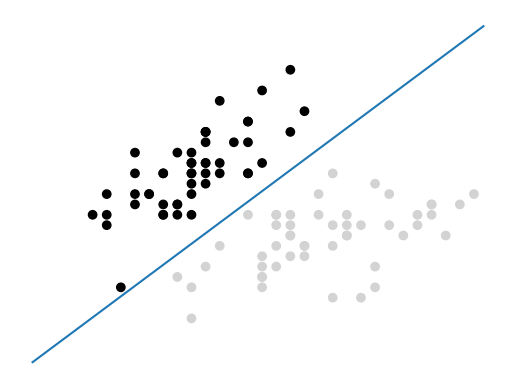

In [140]:
# Load library
from matplotlib import pyplot as plt
# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)
# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();
"""
In this visualization, all observations of class 0 are black and observations of class
1 are light gray. The hyperplane is the decision boundary deciding how new observations
are classified. Specifically, any observation above the line will by classified as
class 0, while any observation below the line will be classified as class 1. We can prove
this by creating a new observation in the top-left corner of our visualization, meaning
it should be predicted to be class 0:
"""

In [142]:
# Create new observation
new_observation = [[ -2, 3]]
# Predict class of new observation
svc.predict(new_observation)
"""
we will not be able to perfectly separate classes. In these situations
there is a balance between SVC maximizing the margin of the hyperplane and minimizing
the misclassification. In SVC, the latter is controlled with the hyperparameter
C. C is a parameter of the SVC learner and is the penalty for misclassifying a data
point. When C is small, the classifier is okay with misclassified data points (high bias
but low variance). When C is large, the classifier is heavily penalized for misclassified
data and therefore bends over backward to avoid any misclassified data points (low
bias but high variance).
"""

array([0])

## Handling Linearly Inseparable Classes Using Kernels

In [144]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Set randomization seed
np.random.seed(0)
# Generate two features
features = np.random.randn(200, 2)
# Use an XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

In [146]:
# Plot observations and decision boundary hyperplane
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier):
  cmap = ListedColormap(("red", "blue"))
  xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),marker="+", label=cl)

In [147]:
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Train model
svc_linear.fit(features, target)
SVC(C=1, kernel='linear', random_state=0)

SVC(C=1, kernel='linear', random_state=0)

<ipython-input-146-03f3525b3d6d>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


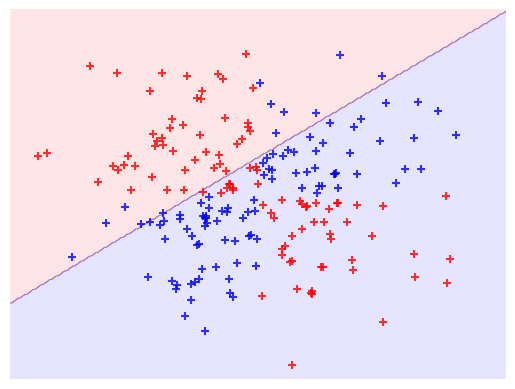

In [148]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

In [150]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

<ipython-input-146-03f3525b3d6d>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


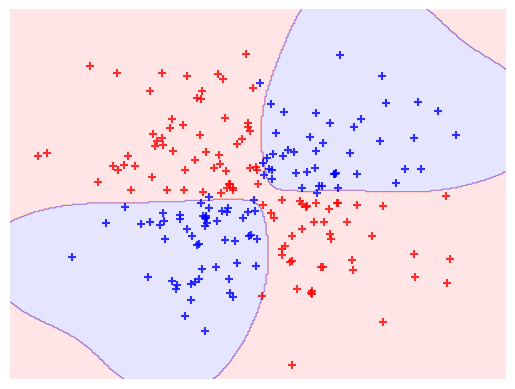

In [151]:
# Plot observations and hyperplane
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

## Creating Predicted Probabilities

In [152]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# Create new observation
new_observation = [[.4, .4, .4, .4]]
# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

## Identifying Support Vectors

In [153]:
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)
# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [155]:
"""
Support vector machines get their name from the fact that the hyperplane is being
determined by a relatively small number of observations, called the support vectors.
Intuitively, think of the hyperplane as being “carried” by these support vectors. These
support vectors are therefore very important to our model. For example, if we remove
an observation that is not a support vector from the data, the model does not change;
however, if we remove a support vector, the hyperplane will not have the maximum
margin.

After we have trained an SVC, scikit-learn offers a number of options for identifying
the support vector. In our solution, we used support_vectors_ to output the actual
observations’ features of the four support vectors in our model. Alternatively, we can
view the indices of the support vectors using support_:

"""
model.support_

array([23, 41, 57, 98], dtype=int32)

In [156]:
"""
Finally, we can use n_support_ to find the number of support vectors belonging to
each class:
"""
model.n_support_

array([2, 2], dtype=int32)

## Handling Imbalanced Classes

In [157]:
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]
# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]
# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Create support vector classifier
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
# Train classifier
model = svc.fit(features_standardized, target)